<a href="https://colab.research.google.com/github/Alis192/kNN-NN-Iris-Regression-Comparison/blob/main/k_NN_%26_NN_prediction_on_IRIS_dataset(update).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly

## **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from sklearn.metrics import mean_squared_error
import plotly.graph_objects as go

## **Preprocess the Data**

In [ ]:
# Preprocess the Iris dataset:
iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(data=np.c_[X, y], columns=iris.feature_names + ['target'])

# Selecting the first two features, "sepal length" and "sepal width," as input x:
input_features = ['sepal length (cm)', 'sepal width (cm)']
X = df[input_features].values

# Selecting the third feature, "petal length," as output y:
target_feature = 'petal length (cm)'
y = df[target_feature].values

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inverse transform X_test to its original scale
X_test_original = scaler.inverse_transform(X_test)


## **Implement k-NN Regression and Find Best k**

In [ ]:
# Implement the k-NN regression algorithm:
def knn_regression(X_train, y_train, X_test, k):
    nbrs = NearestNeighbors(n_neighbors=k).fit(X_train)
    distances, indices = nbrs.kneighbors(X_test)
    y_pred = []
    for i, neighbors in enumerate(indices):
        weights = y_train[neighbors] / k  # Sum of Target Values Divided by K
        radius = distances[i].max()  # Radius of the hyperball (farthest k-neighbor distance)
        area = np.pi * radius**2  # Area of the hyperball
        prediction = weights.sum() / np.exp(area)  # Prediction Calculation
        y_pred.append(prediction)
    return np.array(y_pred)

# Find the best k value
best_k = 1
min_mse = float('inf')
mse_values = []

for k in range(1, 11):  # Start k from 3
    y_pred_knn = knn_regression(X_train, y_train, X_test, k)
    mse = mean_squared_error(y_test, y_pred_knn)
    mse_values.append(mse)
    if mse < min_mse:
        min_mse = mse
        best_k = k

print(f'Best k value: {best_k} with MSE: {min_mse:.2f}')

Best k value: 1 with MSE: 1.13


## **Plot MSE Values for Different k**

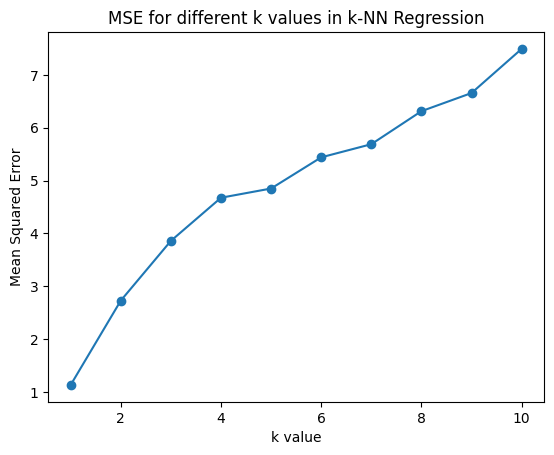

In [ ]:
# Plotting MSE values for different k
plt.figure()
plt.plot(range(1, 11), mse_values, marker='o')
plt.xlabel('k value')
plt.ylabel('Mean Squared Error')
plt.title('MSE for different k values in k-NN Regression')
plt.show()

## **Predict using k-NN Regression and Visualize Results**

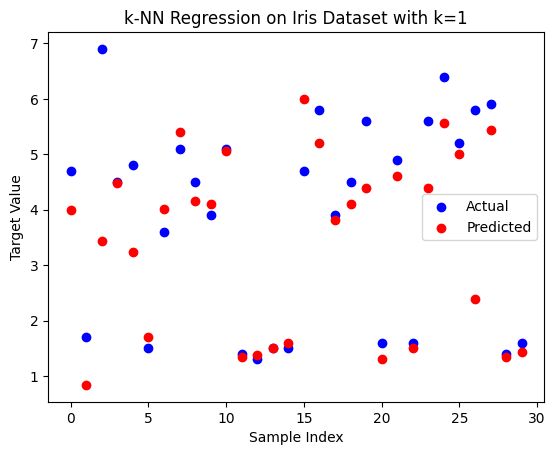

In [ ]:
# Predict using k-NN regression with the best k
y_pred_knn = knn_regression(X_train, y_train, X_test, best_k)

# Ensure lengths of y_test and y_pred_knn match
assert len(y_test) == len(y_pred_knn), f"Length mismatch: y_test={len(y_test)}, y_pred_knn={len(y_pred_knn)}"

# Visualize the results
plt.figure()
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred_knn)), y_pred_knn, color='red', label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.title(f'k-NN Regression on Iris Dataset with k={best_k}')
plt.show()

## **Train Neural Network and Plot Loss Curve**

Iteration 1, loss = 10.60058020
Validation score: -6.257894
Iteration 2, loss = 10.50439715
Validation score: -6.189964
Iteration 3, loss = 10.40885520
Validation score: -6.122378
Iteration 4, loss = 10.31396874
Validation score: -6.055265
Iteration 5, loss = 10.21975967
Validation score: -5.988754
Iteration 6, loss = 10.12626249
Validation score: -5.922670
Iteration 7, loss = 10.03331925
Validation score: -5.857012
Iteration 8, loss = 9.94100828
Validation score: -5.791968
Iteration 9, loss = 9.84932870
Validation score: -5.727457
Iteration 10, loss = 9.75829865
Validation score: -5.663460
Iteration 11, loss = 9.66782594
Validation score: -5.599992
Iteration 12, loss = 9.57794533
Validation score: -5.537096
Iteration 13, loss = 9.48861099
Validation score: -5.474780
Iteration 14, loss = 9.39993509
Validation score: -5.413044
Iteration 15, loss = 9.31181042
Validation score: -5.351803
Iteration 16, loss = 9.22422316
Validation score: -5.291055
Iteration 17, loss = 9.13718516
Validation

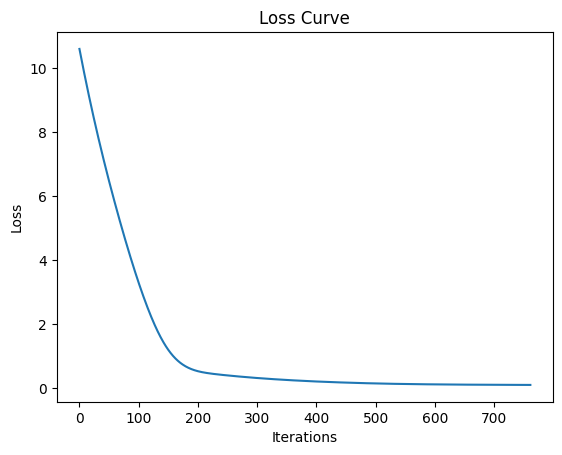

In [ ]:
# Create and train a neural network for regression:
nn_regressor = MLPRegressor(
    hidden_layer_sizes=(100,),
    max_iter=1000,
    random_state=42,
    early_stopping=True,
    n_iter_no_change=10,
    learning_rate_init=0.001,
    verbose=True
)
nn_regressor.fit(X_train, y_train)
y_pred_nn = nn_regressor.predict(X_test)

# Ensure lengths of y_test and y_pred_nn match
assert len(y_test) == len(y_pred_nn), f"Length mismatch: y_test={len(y_test)}, y_pred_nn={len(y_pred_nn)}"

# Plotting the loss curve
plt.figure()
plt.plot(nn_regressor.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

## **Plot Neural Network Predictions**

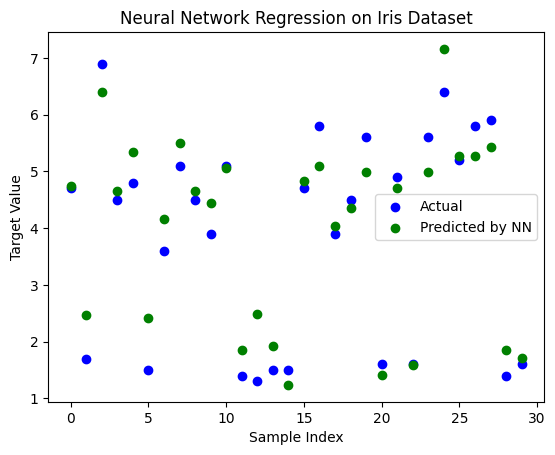

In [ ]:
# Plotting neural network predictions:
plt.figure()
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred_nn)), y_pred_nn, color='green', label='Predicted by NN')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.title('Neural Network Regression on Iris Dataset')
plt.show()


## **Calculate and Print MSE Values**

In [ ]:
# Calculating MSE
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_nn = mean_squared_error(y_test, y_pred_nn)

# Print MSE values
print(f'Mean Squared Error (K-NN): {mse_knn:.2f}')
print(f'Mean Squared Error (NN): {mse_nn:.2f}')

Mean Squared Error (K-NN): 1.13
Mean Squared Error (NN): 0.25


## **Compare Actual vs Predicted Values**

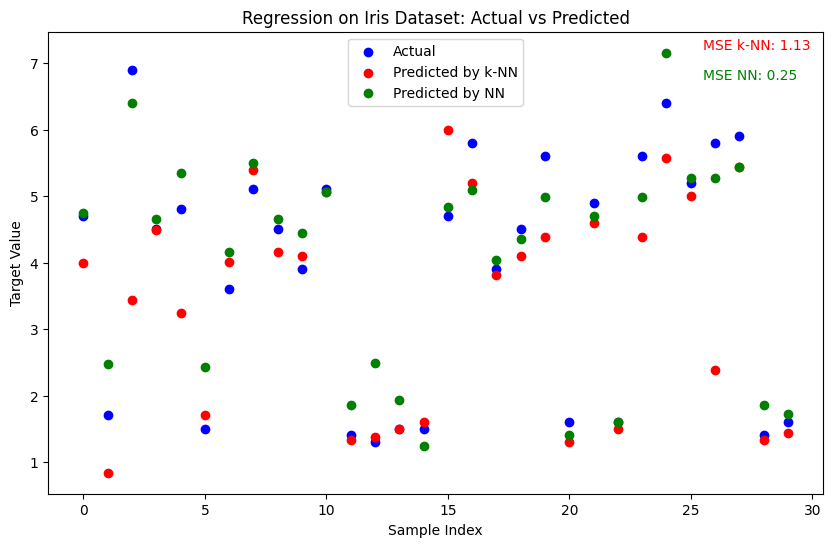

In [ ]:
# Comparison
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred_knn)), y_pred_knn, color='red', label='Predicted by k-NN')
plt.scatter(range(len(y_pred_nn)), y_pred_nn, color='green', label='Predicted by NN')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.title('Regression on Iris Dataset: Actual vs Predicted')
plt.figtext(0.78, 0.85, f'MSE k-NN: {mse_knn:.2f}', color='red')
plt.figtext(0.78, 0.80, f'MSE NN: {mse_nn:.2f}', color='green')
plt.show()

## **3D Graph with Plotly**

In [ ]:
# Creating grid data for plotting surfaces
xi = np.linspace(X_test_original[:, 0].min(), X_test_original[:, 0].max(), 100)
yi = np.linspace(X_test_original[:, 1].min(), X_test_original[:, 1].max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolating the predictions for smoother surfaces
zi_knn = griddata((X_test_original[:, 0], X_test_original[:, 1]), y_pred_knn, (xi, yi), method='cubic')
zi_nn = griddata((X_test_original[:, 0], X_test_original[:, 1]), y_pred_nn, (xi, yi), method='cubic')

# Creating the Plotly figure
fig = go.Figure()

# Adding k-NN prediction surface
fig.add_trace(go.Surface(x=xi, y=yi, z=zi_knn, colorscale='Reds', opacity=0.5, name='k-NN Prediction Surface'))

# Adding NN prediction surface
fig.add_trace(go.Surface(x=xi, y=yi, z=zi_nn, colorscale='Blues', opacity=0.5, name='NN Prediction Surface'))

# Adding actual data points
fig.add_trace(go.Scatter3d(x=X_test_original[:, 0], y=X_test_original[:, 1], z=y_test, mode='markers', marker=dict(color='green', size=5), name='Actual'))

# Adding lines connecting actual points to the XY plane
for i in range(len(X_test_original)):
    fig.add_trace(go.Scatter3d(x=[X_test_original[i, 0], X_test_original[i, 0]], y=[X_test_original[i, 1], X_test_original[i, 1]], z=[0, y_test[i]], mode='lines', line=dict(color='green', width=2), showlegend=False))

# Updating layout
fig.update_layout(scene=dict(xaxis_title='Sepal Length (cm)', yaxis_title='Sepal Width (cm)', zaxis_title='Petal Length (cm)'),
                  title='3D Graph: Actual vs Predicted by k-NN and NN')

# Show the plot
fig.show()
